In [1]:
#data wrangling
import pandas as pd

#datetime
import datetime as dt


In [2]:
# load sheet Transactions trong file KPMG và in ra 5 dòng đầu tiên
transactions = pd.read_excel('KPMG.xlsx', sheet_name='Transactions')

transactions.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [3]:
# in ra info bảng
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [4]:
# describe default
transactions.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


In [5]:
# describe các biến object
transactions.describe(include='object')

,order_status,brand,product_line,product_class,product_size
count,20000,19803,19803,19803,19803
unique,2,6,4,3,3
top,Approved,Solex,Standard,medium,medium
freq,19821,4253,14176,13826,12990


In [6]:
# describe all
transactions.describe(include='all',datetime_is_numeric=True) 

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,20000,19640.000000,20000,19803,19803,19803,19803,20000.000000,19803.000000,19803.000000
unique,NaN,NaN,NaN,NaN,NaN,2,6,4,3,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Approved,Solex,Standard,medium,medium,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,19821,4253,14176,13826,12990,NaN,NaN,NaN
mean,10000.500000,45.36465,1738.246050,2017-07-01 14:08:05.280000,0.500458,NaN,NaN,NaN,NaN,NaN,1107.829449,556.046951,38199.776549
min,1.000000,0.00000,1.000000,2017-01-01 00:00:00,0.000000,NaN,NaN,NaN,NaN,NaN,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,2017-04-01 00:00:00,0.000000,NaN,NaN,NaN,NaN,NaN,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,2017-07-03 00:00:00,1.000000,NaN,NaN,NaN,NaN,NaN,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,2017-10-02 00:00:00,1.000000,NaN,NaN,NaN,NaN,NaN,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,2017-12-30 00:00:00,1.000000,NaN,NaN,NaN,NaN,NaN,2091.470000,1759.850000,42710.000000


In [7]:
# count số dòng bị null ở mỗi cột
transactions.isna().sum() 

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

# 1. Data Correction

## 1.1 Drop NA

In [8]:
# tạo bảng df_dropna_all bằng cách loại bỏ tất cả giá trị null trong bảng và in ra info
df_dropna_all= transactions.dropna(axis=0)
df_dropna_all.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

In [9]:
# tạo bảng df_dropna_online_order bằng cách loại bỏ giá trị null trong cột online_order và in ra info
df_dropna_online_order= transactions[~transactions['online_order'].isnull()]
df_dropna_online_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19640 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19640 non-null  int64         
 1   product_id               19640 non-null  int64         
 2   customer_id              19640 non-null  int64         
 3   transaction_date         19640 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             19640 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19640 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

## 1.2 Fill NA

In [10]:
# fill tất cả NA bằng 0, lưu vào bảng df_fillna_0 và in ra info
df_fillna_0= transactions.fillna(0)
df_fillna_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

In [11]:
# fill NA bằng ffill, lưu vào bảng df_fillna_ffill và in ra info
df_fillna_ffill= transactions.fillna(method="ffill")
df_fillna_ffill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

In [12]:
# fill NA bằng bfill, lưu vào bảng df_fillna_bfill và in ra info
df_fillna_bfill= transactions.fillna(method="bfill")
df_fillna_bfill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

## 1.3. Assess Categorical Data

In [13]:
# load sheet Demographic và hiển thị 5 dòng đầu tiên
demo = pd.read_excel('KPMG.xlsx', sheet_name='CustomerDemographic')

demo.head(5)


C:\Users\Asus\AppData\Local\Temp\ipykernel_17944\170026478.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  demo = pd.read_excel('KPMG.xlsx', sheet_name='CustomerDemographic')


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [14]:
# in ra info bảng
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [15]:
# describe các giá trị object
demo.describe(include='object')

,first_name,last_name,gender,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car
count,4000,3875,4000,3494,3344,4000,4000,3698,4000
unique,3139,3725,6,195,9,3,2,90,2
top,Max,Pristnor,Female,Business Systems Development Analyst,Manufacturing,Mass Customer,N,100,Yes
freq,5,3,2037,45,799,2000,3998,113,2024


In [16]:
# Remove all NA rows, then use output for the following steps
demo = demo.dropna(axis=0)
demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2630 entries, 0 to 3996
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          2630 non-null   int64         
 1   first_name                           2630 non-null   object        
 2   last_name                            2630 non-null   object        
 3   gender                               2630 non-null   object        
 4   past_3_years_bike_related_purchases  2630 non-null   int64         
 5   DOB                                  2630 non-null   datetime64[ns]
 6   job_title                            2630 non-null   object        
 7   job_industry_category                2630 non-null   object        
 8   wealth_segment                       2630 non-null   object        
 9   deceased_indicator                   2630 non-null   object        
 10  default     

In [17]:
# In ra các giá trị unique của cột gender
demo['gender'].unique()

array(['F', 'Male', 'Female', 'Femal'], dtype=object)

In [18]:
# Quy chuẩn cột gender về các nhóm Male, Female, Unisex và in ra giá trị unique mới
demo['gender']=demo['gender'].replace(['F','Femal'],['Female','Female']) 
demo['gender']=demo['gender'].replace(['U','M'],['Male','Male']) 
demo['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [19]:
# Tính tuổi của mỗi khách hàng, lưu vào cột "age" và in ra min age, max age
# from datetime import datetime, date
# def age(born):
#     born = datetime.strptime(born, "%d/%m/%Y").date()
#     today = date.today()
#     return today.year - born.year - ((today.month, 
#                                       today.day) < (born.month, 
#                                                     born.day))
  
# age = demo['DOB'].apply(age)

demo['age'] = int(dt.datetime.today().strftime("%Y")) - demo["DOB"].dt.strftime("%Y").astype(int)
print(demo['age'].min())
print(demo['age'].max())

20
91


In [20]:
# phân nhóm khách hàng dưới 35 tuổi là nhóm "Young", Từ 35 - 55 là "Middle", trên 55 là "Older"
# lưu vào cột "age_group" bằng cách sử dụng hàm cut
demo['age_group'] = pd.cut(x=demo['age'], bins=[0, 35, 55, 100],
                    labels=['Young', 'Middle', 'Older'])
demo['age_group']

0        Older
1       Middle
2        Older
8       Middle
9        Young
         ...  
3992    Middle
3993     Young
3994    Middle
3995    Middle
3996     Young
Name: age_group, Length: 2630, dtype: category
Categories (3, object): ['Young' < 'Middle' < 'Older']

# 2. Data Completeness

In [21]:
#join bảng transactions vs demographic (đều đã dropna) và in ra những giao dịch thiếu thông tin demographic (last name hoặc first name)
transactions=transactions.dropna(axis=0)
demo_trans= pd.merge(demo,transactions)
demo_trans

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0
1,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0
2,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0
3,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0
4,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12977,3496,Danya,Burnyeat,Male,99,1986-04-25,Editor,Manufacturing,Mass Customer,N,...,2017-03-07,0.0,Approved,Trek Bicycles,Mountain,low,medium,574.64,459.71,37659.0
12978,3496,Danya,Burnyeat,Male,99,1986-04-25,Editor,Manufacturing,Mass Customer,N,...,2017-04-02,1.0,Approved,Norco Bicycles,Standard,high,small,1661.92,1479.11,40303.0
12979,3497,Thia,O'Day,Female,73,1986-05-03,Administrative Assistant IV,Manufacturing,Affluent Customer,N,...,2017-11-08,1.0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,42688.0
12980,3497,Thia,O'Day,Female,73,1986-05-03,Administrative Assistant IV,Manufacturing,Affluent Customer,N,...,2017-09-01,1.0,Approved,Solex,Standard,medium,medium,575.27,431.45,35160.0


In [22]:
missinfo_demo=pd.merge(transactions,demo, how='left', on="customer_id")
missinfo_demo= missinfo_demo[(missinfo_demo['first_name'].isnull()) | (missinfo_demo['last_name'].isnull())] 
missinfo_demo

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,age,age_group
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,15,2459,2017-07-15,0.0,Approved,WeareA2B,Standard,medium,medium,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,11,5,1986,2017-01-17,0.0,Approved,Trek Bicycles,Mountain,low,medium,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,17,79,2426,2017-04-03,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,25,89,2822,2017-06-11,0.0,Approved,WeareA2B,Touring,medium,large,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19433,19989,0,714,2017-04-27,1.0,Approved,Norco Bicycles,Standard,low,medium,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19436,19992,11,1374,2017-09-14,0.0,Approved,Giant Bicycles,Standard,high,medium,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19437,19993,13,5,2017-04-28,0.0,Approved,Solex,Standard,medium,medium,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19438,19994,77,2618,2017-12-23,0.0,Approved,Norco Bicycles,Road,medium,large,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 3. Data Aggregation (after dropping null values)

In [23]:
# tính tổng khách hàng có phát sinh giao dịch bằng hàm nunique
demo_trans.nunique(dropna = True)

customer_id                             2329
first_name                              2027
last_name                               2277
gender                                     2
past_3_years_bike_related_purchases      100
DOB                                     2158
job_title                                195
job_industry_category                      9
wealth_segment                             3
deceased_indicator                         2
default                                   90
owns_car                                   2
tenure                                    22
age                                       54
age_group                                  3
transaction_id                         12982
product_id                               101
transaction_date                         364
online_order                               2
order_status                               2
brand                                      6
product_line                               4
product_cl

In [24]:
# Tính số khách hàng mỗi tháng
# hint 1: tạo column year_month bằng hàm dt.strftime
# hint 2: group by year_month và nunique
demo_trans['year_month']= demo_trans['transaction_date'].dt.strftime('%Y_%m')
demo_trans.groupby('year_month').nunique()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
year_month,,,,,,,,,,,,,,,,,,,,,
2017_01,878,824,874,2,100,850,177,9,3,1,...,31,2,2,6,4,3,3,100,100,100
2017_02,859,825,848,2,100,838,176,9,3,1,...,28,2,2,6,4,3,3,100,100,100
2017_03,848,814,837,2,100,820,183,9,3,1,...,31,2,2,6,4,3,3,100,100,100
2017_04,876,822,863,2,100,858,176,9,3,1,...,30,2,2,6,4,3,3,100,100,100
2017_05,871,821,860,2,100,843,177,9,3,1,...,31,2,2,6,4,3,3,100,100,100
2017_06,826,788,823,2,100,809,176,9,3,2,...,30,2,2,6,4,3,3,100,100,100
2017_07,868,817,858,2,100,844,174,9,3,2,...,31,2,2,6,4,3,3,100,100,100
2017_08,888,832,880,2,100,859,179,9,3,1,...,31,2,2,6,4,3,3,100,100,100
2017_09,826,785,813,2,100,807,178,9,3,2,...,30,2,2,6,4,3,3,100,100,100


In [25]:
# Tính gross margin của mỗi tháng. gross_margin = list_price - standard_cost
# hint 1: tạo column gross_margin
# hint 2: group by year_month và sử dụng hàm agg
demo_trans['gross_margin'] = demo_trans['list_price'] - demo_trans['standard_cost']
print(demo_trans['gross_margin'].groupby(demo_trans['year_month']).agg('sum'))


year_month
2017_01    598361.59
2017_02    585956.49
2017_03    583459.93
2017_04    614345.11
2017_05    612053.28
2017_06    557927.11
2017_07    602030.44
2017_08    629727.79
2017_09    557052.49
2017_10    633585.93
2017_11    611242.54
2017_12    581086.57
Name: gross_margin, dtype: float64


In [26]:
# Tính số lượng order và doanh thu group by online_order và order_status 
# hint 1: group by online_order, order_status và sử dụng hàm agg
print(demo_trans.groupby(['online_order','order_status'])['list_price'].agg('sum'))

print(demo_trans.groupby(['online_order','order_status'])['online_order'].agg('count'))

online_order  order_status
0.0           Approved        7177595.84
              Cancelled         61234.06
1.0           Approved        7073731.30
              Cancelled         85719.15
Name: list_price, dtype: float64
online_order  order_status
0.0           Approved        6456
              Cancelled         51
1.0           Approved        6399
              Cancelled         76
Name: online_order, dtype: int64


# 4. Data Visualization

In [32]:
# Sử dụng seaborn và vẽ ra 5 chart khác nhau (column, line, box,...) với đầy đủ tên chart, tên các trục và chú thích.
# Comment insight/message muốn truyền tải thông qua từng chart

import matplotlib.pyplot as plt
import seaborn as sns






In [67]:
monthly_revenue = demo_trans.groupby(demo_trans['year_month'], as_index=False)['list_price'].agg('sum')
gm_ym = demo_trans.groupby(demo_trans['year_month'], as_index=False)['gross_margin'].agg('sum')

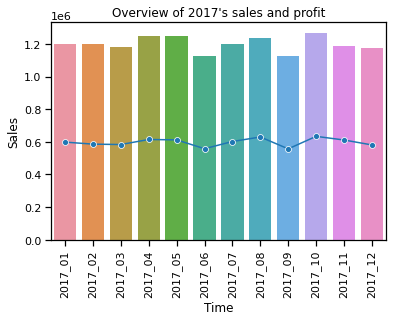

In [107]:
sns.set_context('notebook')
a=sns.lineplot(data =gm_ym, x='year_month', y='gross_margin', marker='o', sort = False)
a=sns.barplot(data=monthly_revenue,
         y='list_price',
         x='year_month')
plt.title("Overview of 2017's sales and profit")
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Sales')
plt.show()
#Nhìn chung, doanh thu năm 2017 dao động trong từng tháng từ 1100000 -> 1200000 với mức lợi nhuận gần 50%  

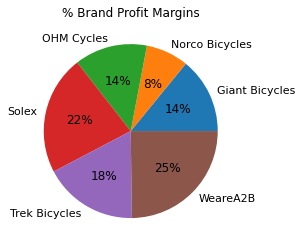

In [122]:
grossmargin_brand = demo_trans.groupby(demo_trans['brand'], as_index=False)['gross_margin'].agg('sum')
brand=['Giant Bicycles','Norco Bicycles','OHM Cycles','Solex','Trek Bicycles','WeareA2B']
plt.pie(grossmargin_brand['gross_margin'], labels=brand, autopct='%.0f%%')
plt.title("% Brand Profit Margins")
plt.show()
#Đóng góp lợi nhuận gồm bởi 6 nhãn hàng: Giant Bicycles, Norco Bicycles, OHM Cycles, Solex, Trex Bicycles và WeareA2B.
#Với 65% đóng góp từ 3 thương hiệu (WeareA2B,Solex,Solex) (25%,22%,18%)


In [113]:
listprice_brand_productline =demo_trans.groupby(['brand','product_line'], as_index=False)['list_price'].agg('sum')

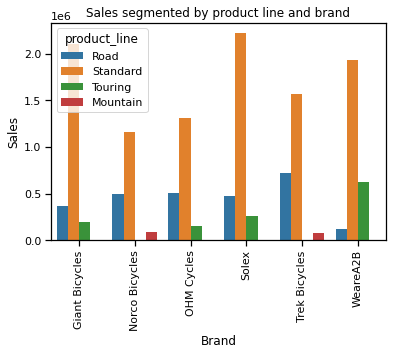

In [121]:
sns.barplot(data=listprice_brand_productline,
         y='list_price',
         x='brand',
         hue='product_line')
plt.title("Sales segmented by product line and brand")
plt.xticks(rotation=90)
plt.xlabel('Brand')
plt.ylabel('Sales')
plt.show()
#Có tổng cộng 4 dòng sản phẩm : Road, Standard, Touring và Mountain
#Standard là dòng sản phẩm phổ biến khi đều có doanh thu cao nhất ở cả 6 hãng 
# Tiếp theo đó là dòng Road> Touring >Mountain
# Dòng Moutain có doanh thu khá thấp và chỉ có 2/6 thương hiệu có thể bán được sản phẩm này

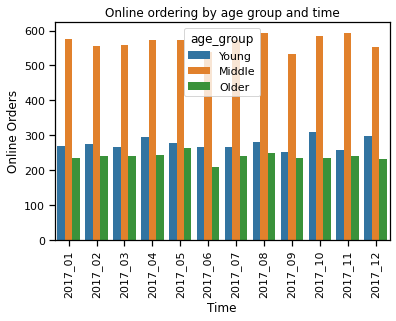

In [117]:
onlorder_age=demo_trans.groupby(['year_month','age_group'], as_index=False)['online_order'].agg('count')

sns.barplot(data=onlorder_age,
         y='online_order',
         x='year_month',
         hue='age_group')
plt.title("Online ordering by age group and time")
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Online Orders')
plt.show()
# Đối tượng khách hàng thuộc nhóm Middle (35-55) chiếm số lượng lớn nhất sau đó tới đối tượng thuộc nhóm Young và cuối cùng là Older
# Số lượng order từ Middle luôn luôn lớn hơn 550 trong khi đó số lượng order từ Older thì <250 cần được cải thiện ở cả 2 đối tượng Young và Older

In [120]:

grossmargin_wseg_pc = demo_trans.groupby(['wealth_segment','product_class'], as_index=False)['gross_margin'].agg('sum')

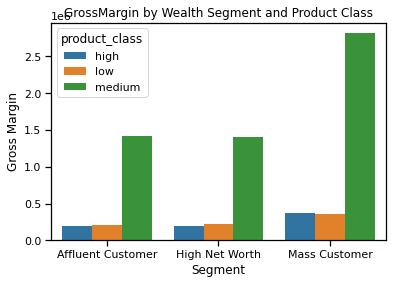

In [119]:

sns.barplot(data=grossmargin_wseg_pc,
         y='gross_margin',
         x='wealth_segment',
         hue='product_class')
plt.title("GrossMargin by Wealth Segment and Product Class")
plt.xlabel('Segment')
plt.ylabel('Gross Margin')
plt.show()
#Mass Customer thường ưa chuộng các dòng sản phẩm Medium nên đóng góp nhiều vào GM cho công ty khi gấp đôi 2 đối tượng còn lại
#Affluent và High Net Worth tuy với số lượng khách hàng ít hơn nhưng họ ưa chuộng vào 2 loại sản phẩm low và high nhiều hơn
#Cần đẩy mạnh phân khúc high cho 2 đối tượng Affluent và High net worth